In [1]:
import os, sys, math
cwd = os.getcwd()
project_path = cwd[:cwd.find('pygents')+7]
if project_path not in sys.path: sys.path.append(project_path)
os.chdir(project_path) 

import pandas as pd

In [2]:
test = [
    (True,"weather is good!"),
    (True,"weather is great!"),
    (False,"what is the weather?"),
    (False,"what about the weather?")
]
test

[(True, 'weather is good!'),
 (True, 'weather is great!'),
 (False, 'what is the weather?'),
 (False, 'what about the weather?')]

In [3]:
from pygents.aigents_api import tokenize_re
from pygents.util import dictcount
from pygents.plot import plot_dict


In [4]:
all_dic = {}
cat_dic = {}
not_dic = {}

tokenized_text = []
for t in test:
    toks = tokenize_re(t[1])
    tokenized_text.append(toks)
    for tok in toks:
        dictcount(all_dic,tok)
        if t[0]:
            dictcount(cat_dic,tok)
        else:
            dictcount(not_dic,tok)
    
print(all_dic)
print(cat_dic)
print(not_dic)


{'weather': 4, 'is': 3, 'good': 1, '!': 2, 'great': 1, 'what': 2, 'the': 2, '?': 2, 'about': 1}
{'weather': 2, 'is': 2, 'good': 1, '!': 2, 'great': 1}
{'what': 2, 'is': 1, 'the': 2, 'weather': 2, '?': 2, 'about': 1}


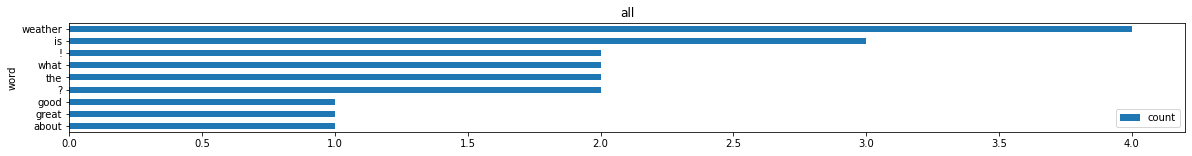

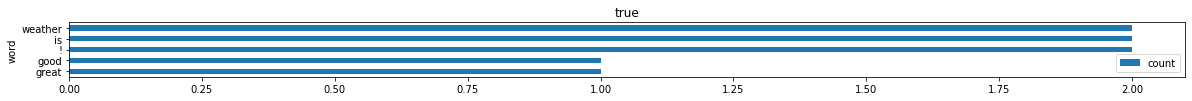

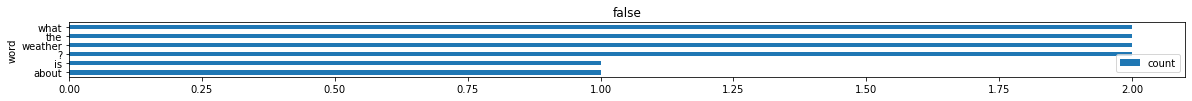

In [5]:
plot_dict(all_dic,"word","count","all")
plot_dict(cat_dic,"word","count","true")
plot_dict(not_dic,"word","count","false")
          

In [6]:
def dic2df(dic):
    df = pd.DataFrame([(key, dic[key]) for key in dic],columns=["word","count"])
    return df
                    

In [7]:
df_all = dic2df(all_dic)
df_all

,word,count
0,weather,4
1,is,3
2,good,1
3,!,2
4,great,1
5,what,2
6,the,2
7,?,2
8,about,1


In [8]:
df_cat = dic2df(cat_dic)
df_cat


,word,count
0,weather,2
1,is,2
2,good,1
3,!,2
4,great,1


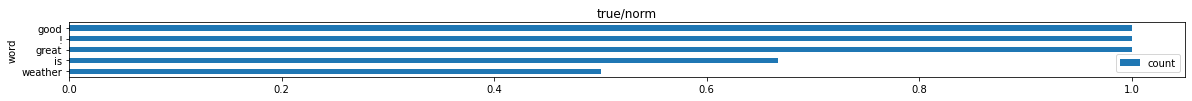

In [17]:
import math
def dicnormdf(dica,dicb,log=False):
    dicc = {}
    for a in dica:
        x = dica[a] / dicb[a]
        dicc[a] = math.log10(x) if log else x
    return dicc

plot_dict(dicnormdf(cat_dic,all_dic),"word","count","true/norm")

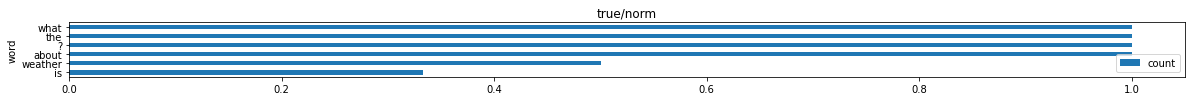

In [15]:
plot_dict(dicnormdf(not_dic,all_dic),"word","count","true/norm")

In [18]:
math.log10(0.001)

-3.0

In [26]:
dic_test = {}
dictcount(dic_test,'aaa')
dictcount(dic_test,'bbb')
dictcount(dic_test,'bbb')
dic_test

{'aaa': 1, 'bbb': 2}

In [27]:
dictcount(dic_test,('aaa'))
dictcount(dic_test,('bbb'))
dictcount(dic_test,('bbb'))
dic_test

{'aaa': 2, 'bbb': 4}

In [28]:
dictcount(dic_test,('aaa','bbb'))
dictcount(dic_test,('bbb','aaa'))
dictcount(dic_test,('bbb','aaa'))
dic_test

{'aaa': 2, 'bbb': 4, ('aaa', 'bbb'): 1, ('bbb', 'aaa'): 2}

In [29]:
dictcount(dic_test,['aaa','bbb'])
dictcount(dic_test,['bbb','aaa'])
dictcount(dic_test,['bbb','aaa'])
dic_test

{'aaa': 5, 'bbb': 7, ('aaa', 'bbb'): 1, ('bbb', 'aaa'): 2}

In [31]:
x = {}
x['a'] = 1
x[('a')]

1

# References
https://www.researchgate.net/publication/379458320_Analysis_of_TF-IDF_and_TF-RF_Feature_Extraction_on_Product_Review_Sentiment

https://arxiv.org/abs/2202.08965
http://webstructor.net/papers/Kolonin-HP-ACA-IC-text.pdf
http://webstructor.net/papers/Kolonin-HP-ACA-IC-present.pdf

https://ieeexplore.ieee.org/document/7361868
https://aigents.com/papers/Kolonin-Automatic-text-classification-and-property-extraction.pdf
https://aigents.com/papers/Kolonin-Automatic-text-classification-and-property-extraction-slides.pdf
